In [82]:
using Particles, Distributions, ConjugatePriors
using ConjugatePriors: NormalInverseWishart
using Plots, GR

In [83]:
truth = MixtureModel([MvNormal(ones(2)*3, eye(2)), MvNormal(ones(2)*-3, eye(2))])

MixtureModel{Distributions.MvNormal{Float64,PDMats.PDMat{Float64,Array{Float64,2}},Array{Float64,1}}}(K = 2)
components[1] (prior = 0.5000): FullNormal(
dim: 2
μ: [3.0, 3.0]
Σ: [1.0 0.0; 0.0 1.0]
)

components[2] (prior = 0.5000): FullNormal(
dim: 2
μ: [-3.0, -3.0]
Σ: [1.0 0.0; 0.0 1.0]
)



In [84]:
xs = [rand(truth) for _ in 1:1000]

1000-element Array{Array{Float64,1},1}:
 [2.8936, 1.6618]     
 [2.60774, 3.69461]   
 [-2.76983, -2.99395] 
 [-5.06424, -3.62465] 
 [-2.93478, -3.89866] 
 [-2.86291, -2.70422] 
 [2.72445, 3.89569]   
 [-2.2331, -2.06484]  
 [-4.04815, -3.64459] 
 [-3.62562, -2.88736] 
 [2.84187, 3.42864]   
 [3.53936, 4.68148]   
 [2.84543, 2.42549]   
 ⋮                    
 [3.46954, 3.56601]   
 [-2.5609, -3.0428]   
 [-3.23516, -0.281887]
 [3.44413, 3.71101]   
 [-1.54608, -2.88128] 
 [3.59685, 3.1679]    
 [2.79311, 3.33891]   
 [-1.88617, -1.25938] 
 [2.97083, 2.50294]   
 [2.10152, 2.13786]   
 [-3.45663, -1.82366] 
 [-2.50725, -1.48104] 

In [85]:
ps = ChenLiuParticles(100, NormalInverseWishart(zeros(2), 0.1, eye(2), 5.), 1.0)

Particles.InfiniteParticle{ConjugatePriors.NormalInverseWishart{Float64},Distributions.MvNormalStats}[0+ Particle, 0+ Particle, 0+ Particle, 0+ Particle, 0+ Particle, 0+ Particle, 0+ Particle, 0+ Particle, 0+ Particle, 0+ Particle  …  0+ Particle, 0+ Particle, 0+ Particle, 0+ Particle, 0+ Particle, 0+ Particle, 0+ Particle, 0+ Particle, 0+ Particle, 0+ Particle]

Particle filter with 100 particles:


In [86]:
filter!(ps, xs)

Fitting particles...100%|███████████████████████████████| Time: 0:00:05


Particles.InfiniteParticle{ConjugatePriors.NormalInverseWishart{Float64},Distributions.MvNormalStats}[3+ Particle, 3+ Particle, 3+ Particle, 2+ Particle, 4+ Particle, 2+ Particle, 4+ Particle, 2+ Particle, 4+ Particle, 4+ Particle  …  3+ Particle, 2+ Particle, 3+ Particle, 4+ Particle, 2+ Particle, 4+ Particle, 2+ Particle, 5+ Particle, 3+ Particle, 3+ Particle]

In [87]:
fit!(ps, xs[1])

Particle filter with 100 particles:


Particles.InfiniteParticle{ConjugatePriors.NormalInverseWishart{Float64},Distributions.MvNormalStats}[3+ Particle, 3+ Particle, 3+ Particle, 2+ Particle, 4+ Particle, 2+ Particle, 4+ Particle, 2+ Particle, 4+ Particle, 4+ Particle  …  3+ Particle, 2+ Particle, 3+ Particle, 4+ Particle, 2+ Particle, 4+ Particle, 2+ Particle, 5+ Particle, 3+ Particle, 3+ Particle]

In [88]:
methods(filter!)

Particle filter with 100 particles:


# 10 methods for generic function "filter!":
filter!(ps::Particles.ParticleFilter, ys::AbstractArray{Float64,1}) in Particles at /home/dave/.julia/v0.6/Particles/src/filters.jl:6
filter!(ps::Particles.ParticleFilter, ys::AbstractArray{Float64,1}, progress) in Particles at /home/dave/.julia/v0.6/Particles/src/filters.jl:6
filter!(ps::Particles.ParticleFilter, ys::AbstractArray{T,1} where T) in Particles at /home/dave/.julia/v0.6/Particles/src/filters.jl:6
filter!(ps::Particles.ParticleFilter, ys::AbstractArray{T,1} where T, progress) in Particles at /home/dave/.julia/v0.6/Particles/src/filters.jl:6
filter!(f, a::AbstractArray{T,1} where T) in Base at array.jl:1901
filter!(f, d::Union{Dict, ObjectIdDict}) in Base at dict.jl:590
filter!(f, d::WeakKeyDict) in Base at weakkeydict.jl:141
filter!(f, d::Associative) in Base at associative.jl:299
filter!(f, s::Set) in Base at set.jl:238
filter!(f::Function, s::DataStructures.OrderedSet) in DataStructures at /home/dave/.julia/v0.6/DataStructures/src/ordered_set.jl:92

In [89]:
filter!(ps, xs)

Fitting particles...100%|███████████████████████████████| Time: 0:00:06


Particles.InfiniteParticle{ConjugatePriors.NormalInverseWishart{Float64},Distributions.MvNormalStats}[6+ Particle, 4+ Particle, 3+ Particle, 2+ Particle, 2+ Particle, 4+ Particle, 4+ Particle, 2+ Particle, 2+ Particle, 6+ Particle  …  3+ Particle, 3+ Particle, 2+ Particle, 4+ Particle, 6+ Particle, 3+ Particle, 5+ Particle, 3+ Particle, 2+ Particle, 4+ Particle]

In [90]:
ps.particles[1]

Particle filter with 100 particles:


  ConjugatePriors.NormalInverseWishart{Float64}([3.00945, 2.98002], Base.LinAlg.Cholesky{Float64,Array{Float64,2}} with factor:
[29.7785 0.472695; 0.0 30.1897], 944.1, 949.0) w/ n=944
  ConjugatePriors.NormalInverseWishart{Float64}([-3.08085, -3.09505], Base.LinAlg.Cholesky{Float64,Array{Float64,2}} with factor:
[28.6294 -1.97418; 0.0 29.9505], 985.1, 990.0) w/ n=985
  ConjugatePriors.NormalInverseWishart{Float64}([-2.02481, -1.57198], Base.LinAlg.Cholesky{Float64,Array{Float64,2}} with factor:
[3.71522 0.681418; 0.0 2.29025], 36.1, 41.0) w/ n=36
  ConjugatePriors.NormalInverseWishart{Float64}([3.73452, 1.86749], Base.LinAlg.Cholesky{Float64,Array{Float64,2}} with factor:
[2.09953 0.263107; 0.0 1.37896], 5.1, 10.0) w/ n=5
  ConjugatePriors.NormalInverseWishart{Float64}([-1.07382, -2.76506], Base.LinAlg.Cholesky{Float64,Array{Float64,2}} with factor:
[2.42253 0.124669; 0.0 2.68148], 24.1, 29.0) w/ n=24
  ConjugatePriors.NormalInverseWishart{Float64}([-1.88437, -2.94428], Base.LinAlg.Cho

In [91]:
sort!(ps.particles, by=weight)

Particle with 6+ components:


100-element Array{Particles.InfiniteParticle{ConjugatePriors.NormalInverseWishart{Float64},Distributions.MvNormalStats},1}:
 6+ Particle
 6+ Particle
 7+ Particle
 6+ Particle
 4+ Particle
 4+ Particle
 5+ Particle
 7+ Particle
 4+ Particle
 6+ Particle
 5+ Particle
 3+ Particle
 4+ Particle
 ⋮          
 5+ Particle
 4+ Particle
 5+ Particle
 4+ Particle
 6+ Particle
 6+ Particle
 4+ Particle
 4+ Particle
 4+ Particle
 4+ Particle
 4+ Particle
 6+ Particle

In [92]:
weight.(ps.particles)

100-element Array{Float64,1}:
 0.00599276
 0.00625883
 0.00636989
 0.00698475
 0.00713717
 0.00713717
 0.00720745
 0.00747194
 0.00760515
 0.00774395
 0.00789685
 0.00791044
 0.008118  
 ⋮         
 0.0111685 
 0.0112761 
 0.011335  
 0.0114425 
 0.011465  
 0.022764  
 0.0244273 
 0.0244273 
 0.0244273 
 0.0244273 
 0.025001  
 0.027425  

# compared with 1D

In [129]:
using ConjugatePriors: NormalInverseChisq, NormalInverseWishart
ConjugatePriors.NormalInverseWishart(nix2::NormalInverseChisq) =
    NormalInverseWishart([nix2.μ], nix2.κ, nix2.ν*reshape([nix2.σ2], 1, 1), nix2.ν)

In [130]:
truth = MixtureModel([Normal(3, 1), Normal(-3, 1)])
xs = rand(truth, 1000)

prior1d = NormalInverseChisq(0., 1., 0.1, 3.)
priorNd = NormalInverseWishart(prior1d)

ps1d = ChenLiuParticles(100, prior1d, 1.0)
psNd = ChenLiuParticles(100, priorNd, 1.0)

filter!(ps1d, xs)
filter!(psNd, [[x] for x in xs])

Fitting particles...100%|███████████████████████████████| Time: 0:00:04
Fitting particles...100%|███████████████████████████████| Time: 0:00:08


Particles.InfiniteParticle{ConjugatePriors.NormalInverseWishart{Float64},Distributions.MvNormalStats}[4+ Particle, 3+ Particle, 3+ Particle, 4+ Particle, 4+ Particle, 9+ Particle, 5+ Particle, 5+ Particle, 3+ Particle, 6+ Particle  …  3+ Particle, 6+ Particle, 5+ Particle, 5+ Particle, 3+ Particle, 6+ Particle, 5+ Particle, 7+ Particle, 5+ Particle, 4+ Particle]

Particle filter with 100 particles:


In [131]:
ps1d

Particles.InfiniteParticle{ConjugatePriors.NormalInverseChisq{Float64},Distributions.NormalStats}[7+ Particle, 4+ Particle, 10+ Particle, 8+ Particle, 5+ Particle, 4+ Particle, 4+ Particle, 7+ Particle, 7+ Particle, 5+ Particle  …  4+ Particle, 6+ Particle, 3+ Particle, 3+ Particle, 5+ Particle, 6+ Particle, 5+ Particle, 8+ Particle, 6+ Particle, 8+ Particle]

Particle filter with 100 particles:


In [132]:
psNd

Particles.InfiniteParticle{ConjugatePriors.NormalInverseWishart{Float64},Distributions.MvNormalStats}[4+ Particle, 3+ Particle, 3+ Particle, 4+ Particle, 4+ Particle, 9+ Particle, 5+ Particle, 5+ Particle, 3+ Particle, 6+ Particle  …  3+ Particle, 6+ Particle, 5+ Particle, 5+ Particle, 3+ Particle, 6+ Particle, 5+ Particle, 7+ Particle, 5+ Particle, 4+ Particle]

Particle filter with 100 particles:


In [133]:
using StatPlots

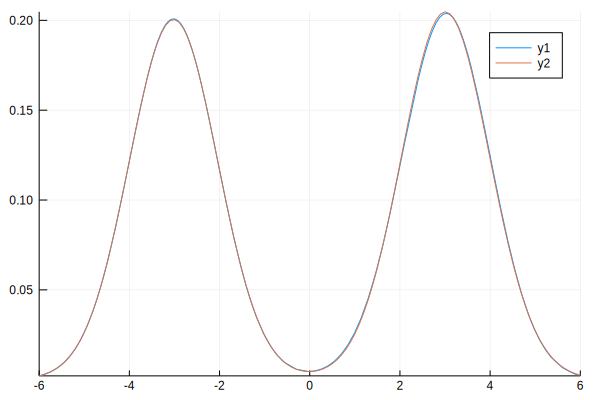

In [134]:
Plots.plot(posterior_predictive(ps1d), -6., 6.)
Plots.plot!(-6:.1:6, pdf.(posterior_predictive(psNd), [[x] for x in -6:.1:6]), seriestype=:line)

In [135]:
assignments(ps1d)

1000×100 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 2  2  2  2  2  2  2  2  2  2  2  2  2     2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  3  2  2  2  2  2     2  2  2  2  2  2  2  3  2  2  2  3
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 2  2  2  2  2  2  2  3  2  2  2  2  2     2  2  2  2  2  2  2  3  2  2  2  3
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 2  2  2  2  2  2  2  3  2  2  2  2  2     2  2  2  2  2  2  2  3  2  2  2  3
 2  2  2  2  2  2  2  3  2  2  2  2  2     3  2  2  2  2  2  2  3  2  2  2  3
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  3  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 2  2  2  2  2  2  2  4  2  2  2  2  2  …  2  2  2  2  2  2  2  4  2  2  2  4
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 2  2  2  2  2  2  2  3  2  2  2  2  2 

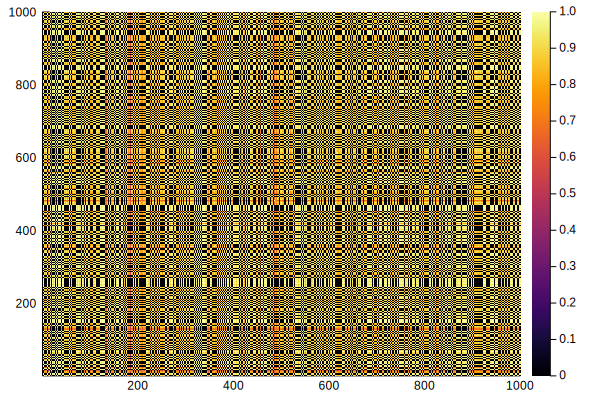

In [136]:
using Distances
function assignment_similarity(ps::Particles.ParticleFilter)
    as = assignments(ps)
    1 .- pairwise(Hamming(), as') ./ size(as, 2)
end

Plots.heatmap(assignment_similarity(ps1d))

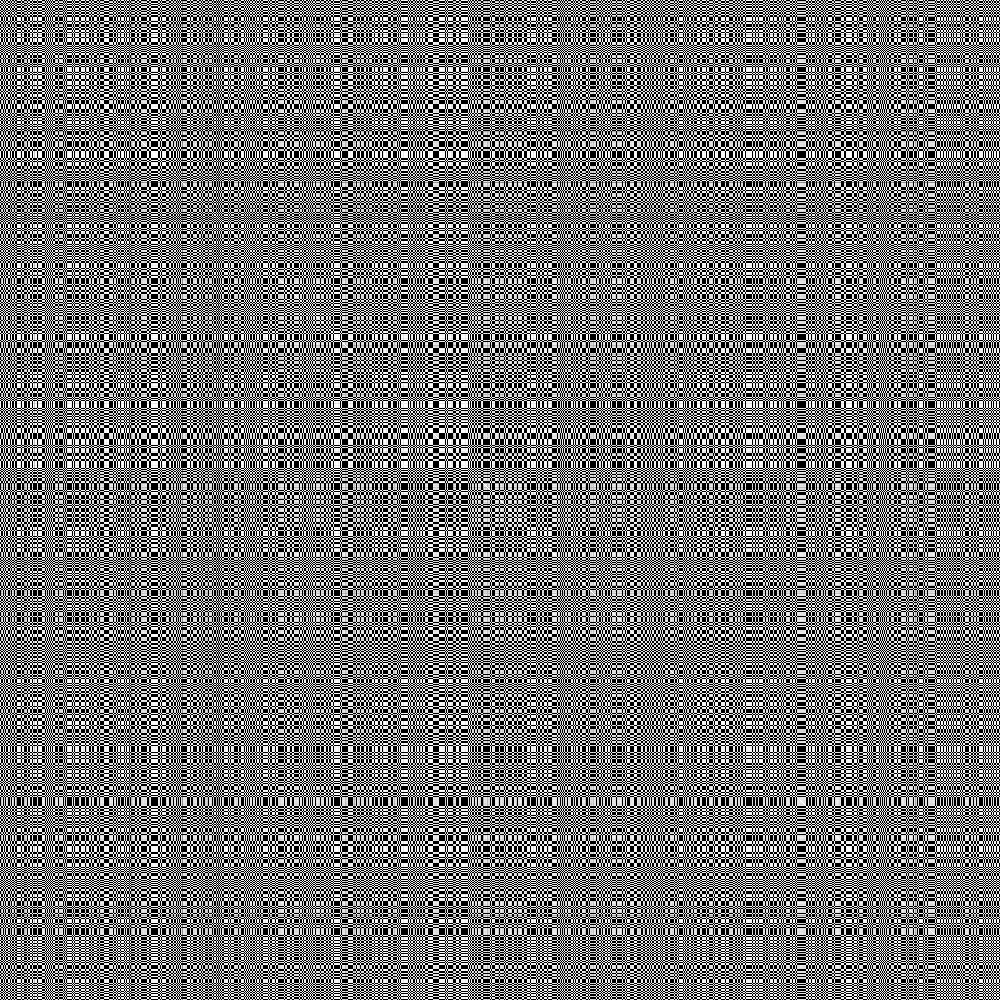

In [137]:
using Colors, Images

Gray.(assignment_similarity(ps1d))

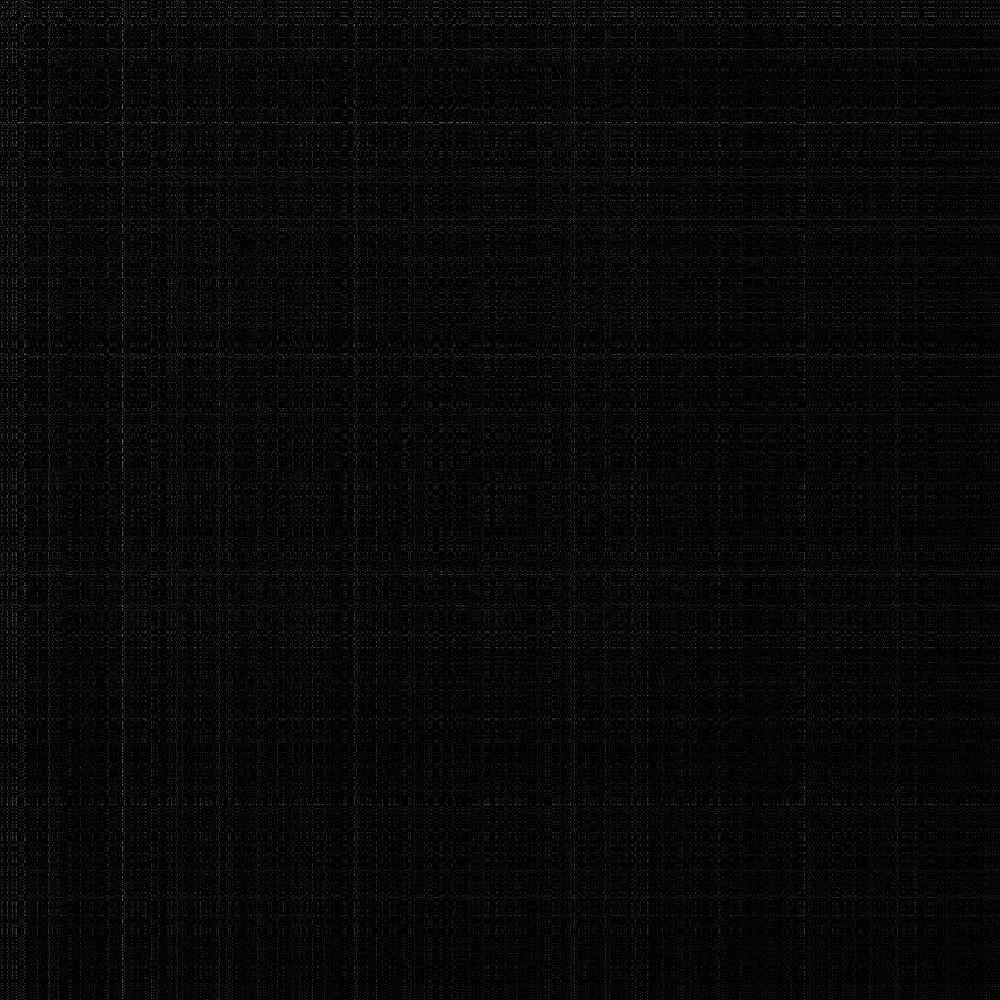

In [138]:
Gray.(abs.(assignment_similarity(ps1d) .- assignment_similarity(psNd)))

This looks reasonable: disagreement, but mostly at the beginning.  And it's similar to what happens for re-running the same model:

Fitting particles...100%|███████████████████████████████| Time: 0:00:04


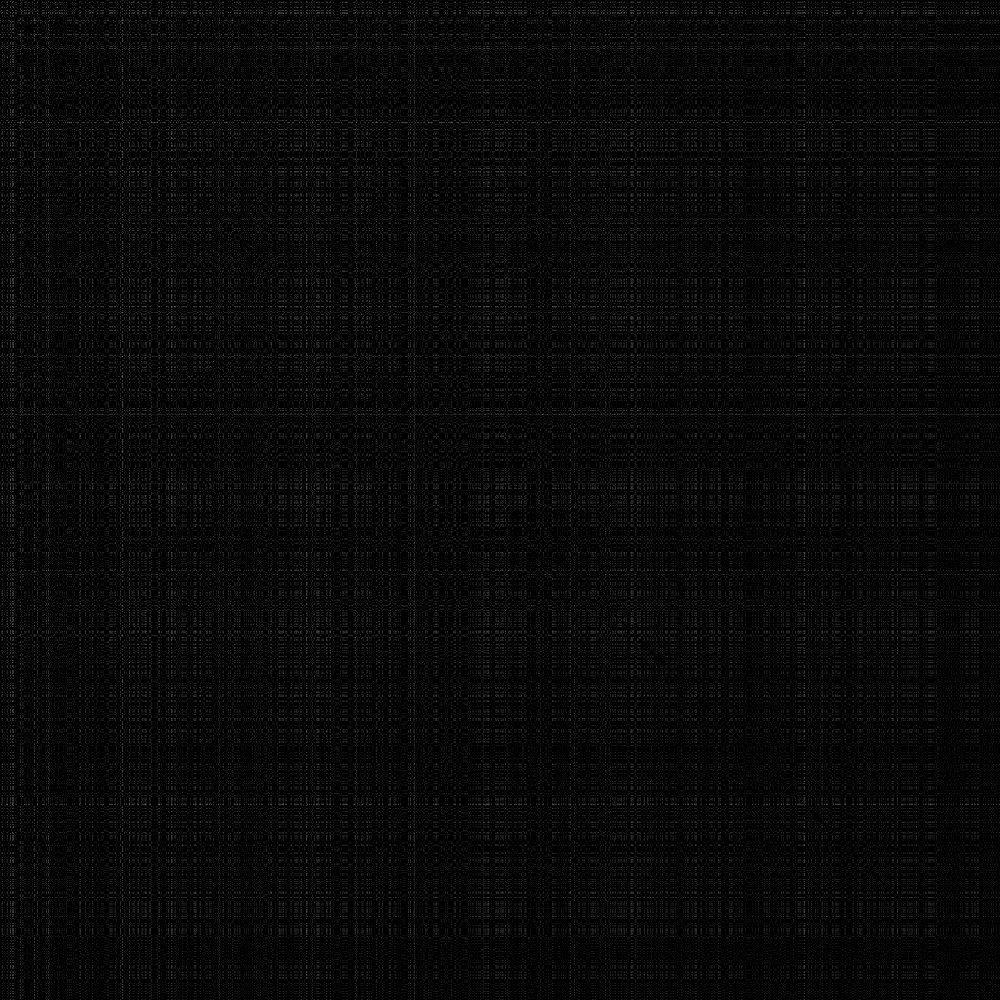

In [139]:
ps1d2 = ChenLiuParticles(100, prior1d, 1.0)
filter!(ps1d2, xs)
Gray.(abs.(assignment_similarity(ps1d2) .- assignment_similarity(psNd)))

## Weights/putatives

Another check: are the weight updates/putatives equivalent for the 1 and ND versions

In [140]:
p1d = InfiniteParticle(prior1d, 1.0)
pNd = InfiniteParticle(priorNd, 1.0)

  (prior: ConjugatePriors.NormalInverseWishart{Float64}([0.0], Base.LinAlg.Cholesky{Float64,Array{Float64,2}} with factor:
[1.73205], 0.1, 3.0) w/ n=0)


Particle with 0+ components:


In [141]:
putatives(p1d, xs[1]) |> first |> weight

0.06654754099638115

In [142]:
putatives(pNd, [xs[1]]) |> first |> weight

0.06654754099638115

In [144]:
puts1d = collect(putatives(p1d, xs[1]))

1-element Array{Particles.InfiniteParticle{ConjugatePriors.NormalInverseChisq{Float64},Distributions.NormalStats},1}:
 1+ Particle

In [151]:
putatives_flat(ps::Vector{<:Particles.AbstractParticle}, y) =
    mapreduce(p -> collect(putatives(p, y)), vcat, ps)
putatives_flat(puts1d, xs[2])

2-element Array{Particles.InfiniteParticle{ConjugatePriors.NormalInverseChisq{Float64},Distributions.NormalStats},1}:
 1+ Particle
 2+ Particle

In [161]:
puts1d = foldl(putatives_flat, [p1d], xs[1:5])
putsNd = foldl(putatives_flat, [pNd], [[x] for x in xs[1:5]])

weight.(puts1d) ≈ weight.(putsNd)

true

okay great it's all good now what